In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
print(torch.__version__)

2.4.0


# Creating a simple Linear Regression model with a known weight and bias

In [2]:
weight = 0.8

bias = 0.2

X = torch.arange(0, 1, 0.002)

X

tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080, 0.0100, 0.0120, 0.0140, 0.0160,
        0.0180, 0.0200, 0.0220, 0.0240, 0.0260, 0.0280, 0.0300, 0.0320, 0.0340,
        0.0360, 0.0380, 0.0400, 0.0420, 0.0440, 0.0460, 0.0480, 0.0500, 0.0520,
        0.0540, 0.0560, 0.0580, 0.0600, 0.0620, 0.0640, 0.0660, 0.0680, 0.0700,
        0.0720, 0.0740, 0.0760, 0.0780, 0.0800, 0.0820, 0.0840, 0.0860, 0.0880,
        0.0900, 0.0920, 0.0940, 0.0960, 0.0980, 0.1000, 0.1020, 0.1040, 0.1060,
        0.1080, 0.1100, 0.1120, 0.1140, 0.1160, 0.1180, 0.1200, 0.1220, 0.1240,
        0.1260, 0.1280, 0.1300, 0.1320, 0.1340, 0.1360, 0.1380, 0.1400, 0.1420,
        0.1440, 0.1460, 0.1480, 0.1500, 0.1520, 0.1540, 0.1560, 0.1580, 0.1600,
        0.1620, 0.1640, 0.1660, 0.1680, 0.1700, 0.1720, 0.1740, 0.1760, 0.1780,
        0.1800, 0.1820, 0.1840, 0.1860, 0.1880, 0.1900, 0.1920, 0.1940, 0.1960,
        0.1980, 0.2000, 0.2020, 0.2040, 0.2060, 0.2080, 0.2100, 0.2120, 0.2140,
        0.2160, 0.2180, 0.2200, 0.2220, 

In [3]:
# Unsqueezing X to add that extra dimenssion
X = X.unsqueeze(dim=1)
X

tensor([[0.0000],
        [0.0020],
        [0.0040],
        [0.0060],
        [0.0080],
        [0.0100],
        [0.0120],
        [0.0140],
        [0.0160],
        [0.0180],
        [0.0200],
        [0.0220],
        [0.0240],
        [0.0260],
        [0.0280],
        [0.0300],
        [0.0320],
        [0.0340],
        [0.0360],
        [0.0380],
        [0.0400],
        [0.0420],
        [0.0440],
        [0.0460],
        [0.0480],
        [0.0500],
        [0.0520],
        [0.0540],
        [0.0560],
        [0.0580],
        [0.0600],
        [0.0620],
        [0.0640],
        [0.0660],
        [0.0680],
        [0.0700],
        [0.0720],
        [0.0740],
        [0.0760],
        [0.0780],
        [0.0800],
        [0.0820],
        [0.0840],
        [0.0860],
        [0.0880],
        [0.0900],
        [0.0920],
        [0.0940],
        [0.0960],
        [0.0980],
        [0.1000],
        [0.1020],
        [0.1040],
        [0.1060],
        [0.1080],
        [0

In [4]:
# fitring the weights and bias with X
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]),
 tensor([[0.2000],
         [0.2016],
         [0.2032],
         [0.2048],
         [0.2064],
         [0.2080],
         [0.2096],
         [0.2112],
         [0.2128],
         [0.2144]]))

In [5]:
# splitting the data into test and train
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train),len(X_test),len(y_test)

(400, 400, 100, 100)

In [13]:
import matplotlib.pyplot as plt

def visualizations(train_data=X_train,
                   train_labels=y_train,
                   test_data=X_test,
                   test_labels=y_test,
                   predictions=None):
    # Setting the figsize
    plt.figure(figsize=(10, 7))
    
    # Plotting the training data
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    
    # Plotting the test data
    plt.scatter(test_data, test_labels, c='r', s=4, label='Test data')
    
    # Plotting the predictions, if provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=4, label='Predicted value')
    
    # Showing the legend
    plt.legend()
    
    # Display the plot
    plt.show()



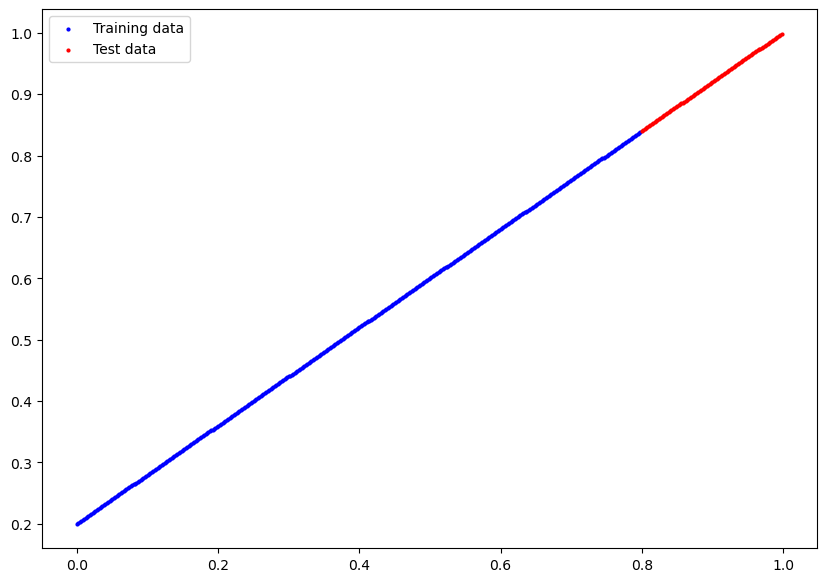

In [14]:
visualizations()

# Creating a simple pytorch model

Steps involves are:
1. Starts with a random weight and bias
2. create the forward network

In [15]:
# Create a linear regression class
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Creating a random weight 
        self.weights = nn.Parameter(torch.randn(1,
                              requires_grad = True,
                              dtype = torch.float))
        # Creating a random bias
        self.bias = nn.Parameter(torch.randn(1,
                            requires_grad = True,
                            dtype = torch.float))
    # forward network
    def forward (self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [16]:
torch.manual_seed(42)
model = LinearRegression()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction
Use inference mode, it removes the gradients, thereby saving compute and time

In [18]:
with torch.inference_mode():
    y_pred = model(X_test)

# Visualizing predictions

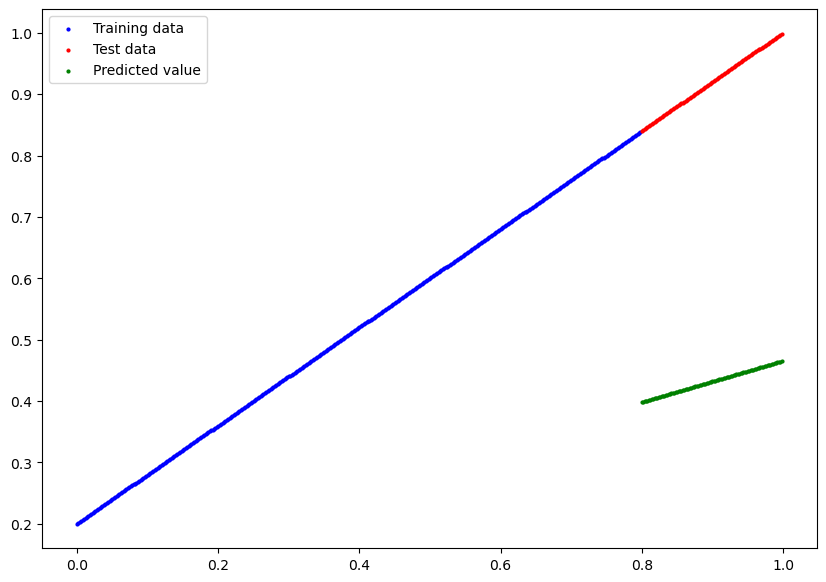

In [19]:
visualizations(predictions=y_pred)

# Turning the model
steps
1. Set the model to training mode
2. Forward pass
3. Calculate the loss

In [20]:
# Creating a loss function
loss_fn = nn.L1Loss()
#Creating an optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                           lr=0.01)

In [21]:
torch.manual_seed(42)

epochs = 7

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Set the model to trainiing mode
    model.train()
    #Forward pass
    y_preds = model(X_train)
    # calculate the loss
    loss = loss_fn(y_preds, y_train)
    #optimize zer0 grad
    optimizer.zero_grad
    # Backeard propagation
    loss.backward()
    # step the optimizer
    optimizer.step()
    #Evaluate the model
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    #if epoch % 10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
    print(model.state_dict())

Epoch: 0 | Loss: 0.25605112314224243 | Test Loss: 0.4741189181804657
OrderedDict({'weights': tensor([0.3407]), 'bias': tensor([0.1388])})
Epoch: 1 | Loss: 0.2444591373205185 | Test Loss: 0.446944922208786
OrderedDict({'weights': tensor([0.3487]), 'bias': tensor([0.1588])})
Epoch: 2 | Loss: 0.22127512097358704 | Test Loss: 0.4061839282512665
OrderedDict({'weights': tensor([0.3606]), 'bias': tensor([0.1888])})
Epoch: 3 | Loss: 0.18649910390377045 | Test Loss: 0.35183584690093994
OrderedDict({'weights': tensor([0.3766]), 'bias': tensor([0.2288])})
Epoch: 4 | Loss: 0.1426534205675125 | Test Loss: 0.2857043147087097
OrderedDict({'weights': tensor([0.3965]), 'bias': tensor([0.2771])})
Epoch: 5 | Loss: 0.10253279656171799 | Test Loss: 0.21119572222232819
OrderedDict({'weights': tensor([0.4199]), 'bias': tensor([0.3305])})
Epoch: 6 | Loss: 0.07748973369598389 | Test Loss: 0.13302215933799744
OrderedDict({'weights': tensor([0.4458]), 'bias': tensor([0.3854])})


In [22]:
with torch.inference_mode():
    y_preds = model(X_test)

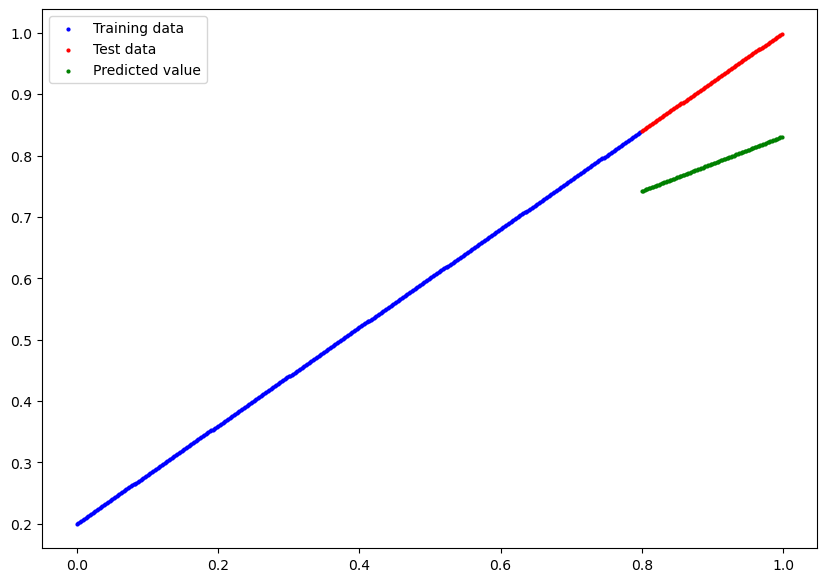

In [23]:
visualizations(predictions=y_preds)

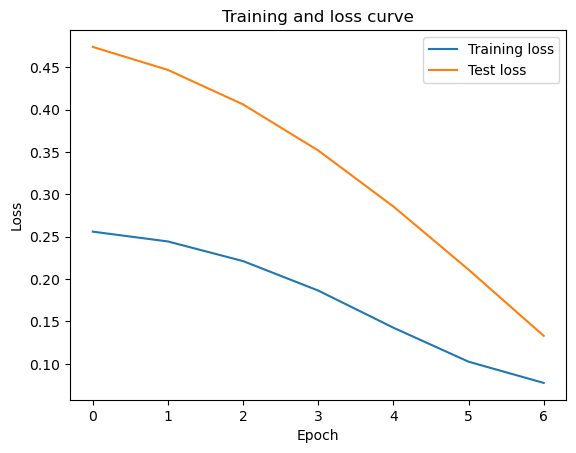

In [24]:
# Ploting the losses
import numpy as np
training_loss_values = np.array(torch.tensor(loss_values).numpy())
testing_loss_values = np.array(torch.tensor(test_loss_values).numpy())

plt.plot(epoch_count, training_loss_values, label='Training loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

# Saving the model

In [25]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


# Loading a PyTorch model

In [26]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\Ire\AppData\Local\Temp\ipykernel_652\1000138861.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [27]:
# Make some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds[:10]

tensor([[0.7420],
        [0.7429],
        [0.7438],
        [0.7447],
        [0.7456],
        [0.7465],
        [0.7474],
        [0.7483],
        [0.7492],
        [0.7501]])

In [28]:
# Make some models preds
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

y_preds[:10]

tensor([[0.7420],
        [0.7429],
        [0.7438],
        [0.7447],
        [0.7456],
        [0.7465],
        [0.7474],
        [0.7483],
        [0.7492],
        [0.7501]])

In [29]:
# Compare loaded model preds with original model preds
y_preds[:10] == loaded_model_preds[:10]

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [30]:
# Importing the required libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.4.0'

In [31]:
# setup device agonostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Your device is running on {device}')

Your device is running on cpu


## Data

In [32]:
# Create some data using y= weights *X + bias
weights = .70
bias = 0.30

# Setting a range fpr our data
start = 0.
end = 1.
step = .02

# Creating X
X = torch.arange(start, end, step).unsqueeze(dim=1)

# Create y
y = weights * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

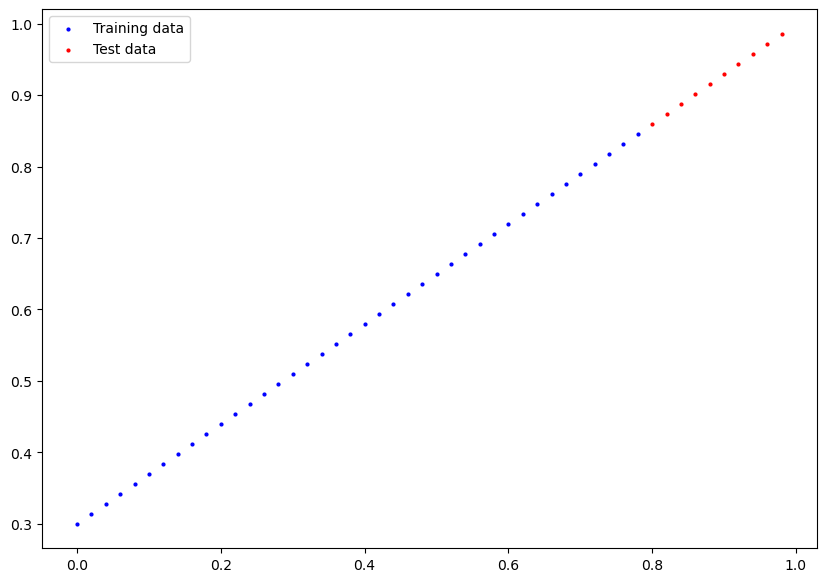

In [34]:
#ploting the data
visualizations(X_train,y_train,X_test,y_test)

## Building a pytorch Linear Model

In [35]:
# Create a linear model by subclassing nn.Module
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearModel()
model_1, model_1.state_dict()

(LinearModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [36]:
# Checking the device type
next(model_1.parameters()).device

device(type='cpu')

In [37]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## Training
We need the following:

1.Loss function

2.Optimizers

3.Trainiing Loop

4.Testing loop

In [38]:
# 1. Loss function
loss_fn = nn.L1Loss() 
# 2. Optimizers
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.01)
# 3. Training loop
epochs =200

for epoch in range(epochs):
    # set the model to traninning mode
    model_1.train()
    # Forward propagation
    y_pred = model_1(X_train)
    # loss
    loss = loss_fn(y_pred, y_train)
    # Optimize the zero grad
    optimizer.zero_grad()
    # Back propagation
    loss.backward()
    # Optimizer step
    optimizer.step()
      ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## Making Predictions

In [40]:
# Activate evaluation state
model_1.eval()
with torch.inference_mode():
    y_pred_new = model_1(X_test)
y_pred_new

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

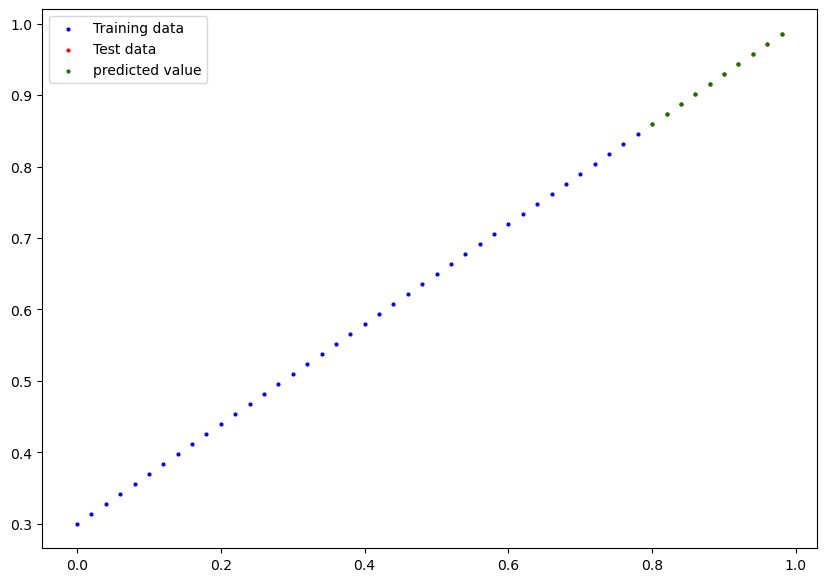

In [43]:
plt.figure(figsize=(10,7))
#plotting the train data using a scatter plot
plt.scatter(X_train, y_train, c='b', s=4, label='Training data')
#plotting the test data using a scatter plot
plt.scatter(X_test, y_test, c='r', s=4, label='Test data')
plt.scatter(X_test,y_pred_new, c='g',s=4, label='predicted value')
plt.legend()
plt.show()

In [44]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_1.pth


In [ ]:
nn.